## BATTLE OF THE NEIGHBORHOODS:
### A COMPARISON OF TORONTO, NEW YORK AND PARIS
##### Ms. Thin Zar Myo Lwin
##### Applied Data Science Capstone Project


## Table of Contents
<a id='section0'></a>
<div class="alert alert-block" style="margin-top: 20px">


<a href='#section1'> 1. Business Problem </a>
    
<a href='#section2'> 2. Data </a>
    
<a href='#section3'> 3. Methodology </a>
    
<a href='#section4'> 4. Analysis </a>
    
<a href='#section5'> 5.Results and Discussion </a>
    
<a href='#section6'> 6. Conclusion</a>
    
</font>
</div>

### Introduction
For the purpose of this data analysis report, we obtain geographical data from the cities of Toronto, New York, and Paris. This includes information regarding the neighborhoods of each city and their coordinates (longitude and latitude) which were scraped and transformed into pandas data frames from the following websites.

### Business Problem <a id='section1'></a>
This is an fact-finding analysis report intending to establish whether the city of Toronto is more similar to New York or Paris. The report is to recommend the entrepreneur, who is willing to open a restaurant, where they should start their own business among these three cities. 

Overall, these report will help the contractors or capitalists to make the correct decision regarding the business analysis to start a new one, including the different kinds of business and diversion destinations that a city might have to deal. 


### Goals & Methodology
The following data analysis technique will be used to recommend the business type to start up for a businessperson or entrepreneur. 

The first technique is city analysis. In this analysis, we found and prepared data to discover how many place of venues are there, based on this result we can know the venue measure of each city. Additionally, we can examine the diversity of venues in each city, which may tell us how varied the urban venues can be and how interrelated between cities. 

In order to get the objectives, we merged all city datasets together to do the clustering analysis, we need to find how the machine learning allocate all cities venues, and exclusively in each cluster how Toronto, New York and Paris venues are scattered? The essential hypothesis is that if two cities are similar, their distribution among clusters should be comparable.

The second way to analyze is borough / neighborhood analysis. we must practice Foursquare figures to investigate the top 10 venues in each district, so that we can catch what kinds of businesses are trendy there. The fundamental viewpoint here is the neighborhood market may have adequate capacity and keenness to opportune a new restaurant if the previously current restaurants here are located.


### Data sources: <a id='section2'></a>

1. Toronto: The Wikipedia page for the list of postal codes in Toronto and a csv file from Coursera for the geospatial coordinates.

Links:

1)	Toronto Neighborhood Data : https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

2)	https://cf-courses-data.s3.us.cloud-objectstorage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701ENSkillsNetwork/labs_v1/Geospatial_Coordinates.csv

3)	Venue data nearby: Foursquarer API

2. New York: I used the New York json file for the list of New York postal codes and coordinates, which were linked to their respective neighborhoods.

Links:

1)	New York Neighborhood Data: 
New York City (JSON) : https://cocl.us/new_york_dataset
2)	Venue data nearby: Foursquare API


3. Paris: This Wikipedia page for the list of areas of Paris wherein the coordinates were easily obtained from the table.

Links:

1)	https://en.wikipedia.org/wiki/Arrondissements_of_Paris
2)	Venue data nearby: Foursquare API


Import all dependencies needed

In [660]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests
import random
from bs4 import BeautifulSoup as bs
import html5lib

from IPython.display import Image
from IPython.core.display import HTML

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
import geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0


# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import re

print('Libraries imported.')

Matplotlib version:  3.1.0
Libraries imported.


In [49]:
# create a function to output all venues nearby the specified location.

def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=101):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [50]:
CLIENT_ID = 'TCVAWOIFYFJJFZWXZR0YIOV3MUPROS4IZCRPNYHMSDMK0DLN' #  Foursquare ID
CLIENT_SECRET = 'PH4KJQKLN31VBYRH0DYBCGAT0E2CAAE4AG1TYVUKBLXWHP0C' #  Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FOACYMUX51FQS2WK3PFCG0JDNCVCLQK2BQJ2ORMDJA2T5BFI
CLIENT_SECRET:TKK4DH2VJSWYXY53QFUFU4RBPU02ING44V0QOA1QJRKTS2T2


<a id='section1'></a>
## 1. Prepare New York dataset

<a href='#section0'> or Go back to Table of Contents </a>

In [44]:
with open('nyu-geojson.json') as json_data:
    newyork_data = json.load(json_data)

In [45]:
neighborhoods_data = newyork_data['features']

# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)


In [46]:
neighborhoods.insert(0,'City',value='New_york',allow_duplicates = False)
neighborhoods.insert(1,'City_code',value=0,allow_duplicates = False)
all_newyork_neighborhoods=neighborhoods

In [47]:
print('the shape of dataset is {}'.format(all_newyork_neighborhoods.shape))
all_newyork_neighborhoods.head()

the shape of dataset is (306, 6)


,City,City_code,Borough,Neighborhood,Latitude,Longitude
0,New_york,0,Bronx,Wakefield,40.894705,-73.847201
1,New_york,0,Bronx,Co-op City,40.874294,-73.829939
2,New_york,0,Bronx,Eastchester,40.887556,-73.827806
3,New_york,0,Bronx,Fieldston,40.895437,-73.905643
4,New_york,0,Bronx,Riverdale,40.890834,-73.912585


In [48]:
# We choose 306 sample neighborhoods in New York.
newyork_neighborhoods_input=all_newyork_neighborhoods.sample(n=306)

<a id='section2'></a>
## 2. Prepare Toronto dataset

<a href='#section0'> or Go back to Table of Contents </a>

In [51]:
#The below url contains an html table with data of postal codes of Canada: M.
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text

#pass the data into the BeautifulSoup constructor
soup = bs(data,"html5lib")

#find a html table in the web page
table = soup.find('table') 

In [52]:
table_contents=[]
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['Postal Code'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto',
                                             'Queen\'s Park':'Downtown Toronto',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto',
                                             'EtobicokeNorthwest':'Etobicoke','East YorkEast Toronto':'East York',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [53]:
# Select all duplicate rows based on one column
duplicateRowsDF = df[df.duplicated(['Postal Code'])]
print("Duplicate Rows based on a single column are:", duplicateRowsDF, sep='\n')

Duplicate Rows based on a single column are:
Empty DataFrame
Columns: [Borough, Neighborhood, Postal Code]
Index: []


In [54]:
df_coordinates = pd.read_csv('Geospatial_Coordinates.csv')
df_coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [55]:
merged_df = pd.merge(df,df_coordinates,on='Postal Code')
merged_df.head(10)

,Borough,Neighborhood,Postal Code,Latitude,Longitude
0,North York,Parkwoods,M3A,43.753259,-79.329656
1,North York,Victoria Village,M4A,43.725882,-79.315572
2,Downtown Toronto,"Regent Park, Harbourfront",M5A,43.654260,-79.360636
3,North York,"Lawrence Manor, Lawrence Heights",M6A,43.718518,-79.464763
4,Downtown Toronto,Ontario Provincial Government,M7A,43.662301,-79.389494
5,Etobicoke,Islington Avenue,M9A,43.667856,-79.532242
6,Scarborough,"Malvern, Rouge",M1B,43.806686,-79.194353
7,North York,Don Mills North,M3B,43.745906,-79.352188
8,East York,"Parkview Hill, Woodbine Gardens",M4B,43.706397,-79.309937
9,Downtown Toronto,"Garden District, Ryerson",M5B,43.657162,-79.378937


In [56]:
index = merged_df[merged_df['Borough'] == 'Mississauga'].index
merged_df.drop(index,axis=0,inplace=True)

In [57]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(merged_df['Borough'].unique()),
        len(merged_df['Neighborhood'].unique())
    )
)

The dataframe has 9 boroughs and 102 neighborhoods.


In [58]:
toronto_df = merged_df
toronto_df.head()

,Borough,Neighborhood,Postal Code,Latitude,Longitude
0,North York,Parkwoods,M3A,43.753259,-79.329656
1,North York,Victoria Village,M4A,43.725882,-79.315572
2,Downtown Toronto,"Regent Park, Harbourfront",M5A,43.654260,-79.360636
3,North York,"Lawrence Manor, Lawrence Heights",M6A,43.718518,-79.464763
4,Downtown Toronto,Ontario Provincial Government,M7A,43.662301,-79.389494


In [59]:
toronto_df.insert(0,'City',value='Toronto',allow_duplicates=False)

toronto_df.insert(1,'City_code',value=1,allow_duplicates=False)

all_toronto_neighborhoods=toronto_df

In [60]:
print('the shape of dataset is {}'.format(all_toronto_neighborhoods.shape))

all_toronto_neighborhoods.head()

the shape of dataset is (102, 7)


,City,City_code,Borough,Neighborhood,Postal Code,Latitude,Longitude
0,Toronto,1,North York,Parkwoods,M3A,43.753259,-79.329656
1,Toronto,1,North York,Victoria Village,M4A,43.725882,-79.315572
2,Toronto,1,Downtown Toronto,"Regent Park, Harbourfront",M5A,43.654260,-79.360636
3,Toronto,1,North York,"Lawrence Manor, Lawrence Heights",M6A,43.718518,-79.464763
4,Toronto,1,Downtown Toronto,Ontario Provincial Government,M7A,43.662301,-79.389494


In [62]:
# We choose 103 sample neighborhoods in Toronoto
toronto_neighborhoods_input=all_toronto_neighborhoods

<a id='section3'></a>
## 3. Prepare Paris dataset

<a href='#section0'> or Go back to Table of Contents </a>

In [63]:
# import dataframe from file of Paris_geo, which was sourced from "https://en.wikipedia.org/wiki/Arrondissements_of_Paris" as of 12th Apr, 2020.
paris_df = pd.read_csv('paris_geo.csv')
middle_inparis=paris_df

middle_inparis.insert(0,'City',value='Paris',allow_duplicates=False)

middle_inparis.insert(1,'City_code',value=2,allow_duplicates=False)

all_paris_neighborhoods=middle_inparis

In [64]:
print('the shape of dataset is {}'.format(all_paris_neighborhoods.shape))
all_paris_neighborhoods.head()

the shape of dataset is (29, 6)


,City,City_code,Borough,Neighborhood,Latitude,Longitude
0,Paris,2,Louvre,Louvre,48.8606,2.3376
1,Paris,2,Bourse,Bourse,48.8687,2.3412
2,Paris,2,Temple,Temple,48.8659,2.3611
3,Paris,2,Hotel-de-Ville,Hotel-de-Ville,48.8534,2.3583
4,Paris,2,Pantheon,Pantheon,48.8462,2.3464


In [67]:
paris_neighborhoods_input=all_paris_neighborhoods

<a id='section4'></a>
## 4. 'Foursqure' nearby venues in three analysis cities

<a href='#section0'> or Go back to Table of Contents </a>

In [69]:
paris_venues = getNearbyVenues(names=paris_neighborhoods_input['Neighborhood'],
                                   latitudes=paris_neighborhoods_input['Latitude'],
                                   longitudes=paris_neighborhoods_input['Longitude']
                                  )

Louvre
Bourse
Temple
Hotel-de-Ville
Pantheon
Luxembourg
Palais-Bourbon
Quartier des Champs-Elysees
Quartier du Faubourg-du-Roule
Quartier de la Madeleine
Quartier de l'Europe
Opera
Entrepot
Popincourt
Reuilly
Gobelins
Observatoire
Javel
Grenelle
Necker 
Saint-Lambert
Passy
Batignolles-Monceau
Quartier de La Chapelle
Goutte d'Or
Pigalle
Montmartre
Buttes-Chaumont
Menilmontant


In [70]:
print('the shape of dataset is {}'.format(paris_venues.shape))
paris_venues.head()

the shape of dataset is (1921, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Louvre,48.8606,2.3376,Cour Carrée du Louvre,48.860360,2.338543,Pedestrian Plaza
1,Louvre,48.8606,2.3376,Musée du Louvre,48.860847,2.336440,Art Museum
2,Louvre,48.8606,2.3376,La Vénus de Milo (Vénus de Milo),48.859943,2.337234,Exhibit
3,Louvre,48.8606,2.3376,Cour Napoléon,48.861172,2.335088,Plaza
4,Louvre,48.8606,2.3376,Pont des Arts,48.858565,2.337635,Bridge


In [83]:
paris_venues = paris_venues.dropna()
paris_venues.shape

(1921, 7)

In [72]:
newyork_venues = getNearbyVenues(names=newyork_neighborhoods_input['Neighborhood'],
                                   latitudes=newyork_neighborhoods_input['Latitude'],
                                   longitudes=newyork_neighborhoods_input['Longitude']
                                  )

Weeksville
Bellaire
Bushwick
Mill Island
Queens Village
Jamaica Estates
Port Morris
Manor Heights
Co-op City
Fordham
Financial District
Holliswood
Astoria Heights
Greenridge
Starrett City
Cambria Heights
Ditmas Park
Arden Heights
Edgewater Park
Midtown South
Park Slope
Arrochar
Douglaston
Coney Island
High  Bridge
Pelham Parkway
West Brighton
Oakwood
Throgs Neck
Fort Greene
Lenox Hill
Olinville
Sandy Ground
Prospect Lefferts Gardens
Flatbush
Bulls Head
North Riverdale
Travis
Boerum Hill
Lighthouse Hill
Richmond Town
East Harlem
Howard Beach
Soundview
Midtown
East Elmhurst
Huguenot
Sunnyside
Longwood
College Point
Gravesend
Mariner's Harbor
Bedford Stuyvesant
Remsen Village
Concourse Village
Flushing
Ocean Parkway
Broadway Junction
Pelham Bay
Sheepshead Bay
Greenwich Village
Kew Gardens Hills
Fox Hills
Hunts Point
Beechhurst
Sea Gate
Spuyten Duyvil
Woodrow
Forest Hills Gardens
Glendale
St. George
Charleston
Downtown
Forest Hills
Bloomfield
Sunnyside
Eltingville
Morrisania
Fulton Ferry
F

In [73]:
print('the shape of dataset is {}'.format(newyork_venues.shape))
newyork_venues.head()

the shape of dataset is (10147, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Weeksville,40.67504,-73.930531,New Heights Bar & Grill,40.674421,-73.933269,Cocktail Bar
1,Weeksville,40.67504,-73.930531,Hardee,40.671893,-73.930841,Chinese Restaurant
2,Weeksville,40.67504,-73.930531,Lakou Cafe,40.671983,-73.930552,Juice Bar
3,Weeksville,40.67504,-73.930531,St. John's Park,40.674194,-73.934770,Park
4,Weeksville,40.67504,-73.930531,Weeksville Heritage Center,40.674475,-73.925474,History Museum


In [84]:
newyork_venues = newyork_venues.dropna()
newyork_venues.shape

(10147, 7)

In [75]:
toronto_venues = getNearbyVenues(names=toronto_neighborhoods_input['Neighborhood'],
                                   latitudes=toronto_neighborhoods_input['Latitude'],
                                   longitudes=toronto_neighborhoods_input['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don Mills North
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview East
The Danforth

In [76]:
print('the shape of dataset is {}'.format(toronto_venues.shape))
toronto_venues.head()

the shape of dataset is (2119, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,KFC,43.754387,-79.333021,Fast Food Restaurant
2,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [38]:
toronto_venues.to_csv(r'C:\Users\boxin\Desktop\py4e\5_Applied_Data_Science_Capstone\toronto_venues.csv',index=False)

In [82]:
toronto_venues.dropna()
toronto_venues.shape

(2119, 7)

In [77]:
# Density: the no. of venues per unit of neighborhood in New_york
print('the no. of venues per unit of neighborhood in New York is {}'.format(newyork_venues.shape[0]/newyork_neighborhoods_input.shape[0]))

# Density: the no. of venues per unit of neighborhood in Toronto
print('the no. of venues per unit of neighborhood in Toronto is {}'.format(toronto_venues.shape[0]/toronto_neighborhoods_input.shape[0]))

# Density: the no. of venues per unit of neighborhood in Paris
print('the no. of venues per unit of neighborhood in Paris is {}'.format(paris_venues.shape[0]/paris_neighborhoods_input.shape[0]))

the no. of venues per unit of neighborhood in New York is 33.16013071895425
the no. of venues per unit of neighborhood in Toronto is 20.774509803921568
the no. of venues per unit of neighborhood in Paris is 66.24137931034483


## 5. Combine the datasets of three cities

<a href='#section0'> or Go back to Table of Contents </a>

In [85]:
newyork_datasets=newyork_neighborhoods_input.join(newyork_venues.set_index('Neighborhood'),on='Neighborhood')

paris_datasets=paris_neighborhoods_input.join(paris_venues.set_index('Neighborhood'),on='Neighborhood')

toronto_datasets=toronto_neighborhoods_input.join(toronto_venues.set_index('Neighborhood'),on='Neighborhood')

In [86]:
newyork_paris_datasets=pd.concat([newyork_datasets,paris_datasets])
all_datasets=pd.concat([newyork_paris_datasets,toronto_datasets])
all_datasets.reset_index(drop=True,inplace=True)
print("the shape of the dataframe merging all three cities' data together is {}".format(all_datasets.shape))

the shape of the dataframe merging all three cities' data together is (14544, 13)


/Users/Admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [87]:
all_datasets.head()

,Borough,City,City_code,Latitude,Longitude,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Postal Code,Venue,Venue Category,Venue Latitude,Venue Longitude
0,Brooklyn,New_york,0,40.67504,-73.930531,Weeksville,40.67504,-73.930531,NaN,New Heights Bar & Grill,Cocktail Bar,40.674421,-73.933269
1,Brooklyn,New_york,0,40.67504,-73.930531,Weeksville,40.67504,-73.930531,NaN,Hardee,Chinese Restaurant,40.671893,-73.930841
2,Brooklyn,New_york,0,40.67504,-73.930531,Weeksville,40.67504,-73.930531,NaN,Lakou Cafe,Juice Bar,40.671983,-73.930552
3,Brooklyn,New_york,0,40.67504,-73.930531,Weeksville,40.67504,-73.930531,NaN,St. John's Park,Park,40.674194,-73.934770
4,Brooklyn,New_york,0,40.67504,-73.930531,Weeksville,40.67504,-73.930531,NaN,Weeksville Heritage Center,History Museum,40.674475,-73.925474


In [88]:
all_datasets.shape

(14544, 13)

In [342]:
analyze_venue_cateogry_df = all_datasets
analyze_venue_cateogry_df.shape

(14544, 13)

In [343]:
analyze_venue_cateogry_df.groupby('City').count().sort_values(by=['Venue Category'], ascending=False).head()

,Borough,City_code,Latitude,Longitude,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Postal Code,Venue,Venue Category,Venue Latitude,Venue Longitude
City,,,,,,,,,,,,
New_york,10501,10501,10501,10501,10501,10499,10499,0,10499,10499,10499,10499
Toronto,2122,2122,2122,2122,2122,2119,2119,2122,2119,2119,2119,2119
Paris,1921,1921,1921,1921,1921,1921,1921,0,1921,1921,1921,1921


In [344]:
# one hot encoding
onehot = pd.get_dummies(analyze_venue_cateogry_df[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['City'] = analyze_venue_cateogry_df['City'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head()

,City,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Basque Restaurant,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burgundian Restaurant,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Basketball Court,College Bookstore,College Cafeteria,College Gym,College Rec Center,College Stadium,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Corsican Restaurant,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Curling Ice,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Distribution Center,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dosa Place,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Knitting Store,Korean BBQ Restaurant,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Lyonese Bouchon,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress 

In [345]:
onehot.shape

(14544, 488)

In [346]:
category_grouped_df = onehot.groupby('City').mean().reset_index()
category_grouped_df.head()

,City,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Basque Restaurant,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burgundian Restaurant,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Basketball Court,College Bookstore,College Cafeteria,College Gym,College Rec Center,College Stadium,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Corsican Restaurant,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Curling Ice,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Distribution Center,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dosa Place,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Knitting Store,Korean BBQ Restaurant,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Lyonese Bouchon,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress 

In [348]:
category_grouped_df.shape

(3, 488)

In [349]:
# create a function to return the 10 most frequent venues for each neighborhood
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [352]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = category_grouped_df['City']

for ind in np.arange(category_grouped_df.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(category_grouped_df.iloc[ind, :], num_top_venues)

city_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,New_york,Pizza Place,Coffee Shop,Italian Restaurant,Deli / Bodega,Bakery,Chinese Restaurant,Bar,Grocery Store,Park,Sandwich Place
1,Paris,French Restaurant,Hotel,Italian Restaurant,Bakery,Bar,Café,Bistro,Japanese Restaurant,Plaza,Coffee Shop
2,Toronto,Coffee Shop,Café,Restaurant,Park,Bakery,Pizza Place,Italian Restaurant,Japanese Restaurant,Sandwich Place,Clothing Store


<a id='section6'></a>
## 6. Datasets analysis

<a href='#section0'> or Go back to Table of Contents </a>

In [398]:
onehot=pd.get_dummies(all_datasets[['Venue Category']], prefix="", prefix_sep="")

# drop the column'neighborhood'
onehot.drop(['Neighborhood'],axis=1,inplace=True)

# insert the neighborhood column into onehot's first column
onehot.insert(0,'Neighborhood',all_datasets['Neighborhood'],allow_duplicates = True)
onehot.insert(1,'City',all_datasets['City'],allow_duplicates = True)
onehot.insert(2,'City_code',all_datasets['City_code'],allow_duplicates = True)
onehot.insert(3,'Borough',all_datasets['Borough'],allow_duplicates = True)

print('the shape of the onehot is {}'.format(onehot.shape))
onehot.head()

#onehot['City_code'].value_counts()

the shape of the onehot is (14544, 490)


,Neighborhood,City,City_code,Borough,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Basque Restaurant,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burgundian Restaurant,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Basketball Court,College Bookstore,College Cafeteria,College Gym,College Rec Center,College Stadium,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Corsican Restaurant,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Curling Ice,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Distribution Center,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dosa Place,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Knitting Store,Korean BBQ Restaurant,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Lyonese Bouchon,Malay Restaurant,Market,Martial Arts 

In [399]:
analysis_group=onehot.drop(['City','City_code','Borough'],axis=1).groupby('Neighborhood').mean().reset_index()
print('the shape of group is {}'.format(analysis_group.shape))
analysis_group.head(10)

the shape of group is (432, 487)


,Neighborhood,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Basque Restaurant,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burgundian Restaurant,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Basketball Court,College Bookstore,College Cafeteria,College Gym,College Rec Center,College Stadium,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Corsican Restaurant,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Curling Ice,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Distribution Center,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dosa Place,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Knitting Store,Korean BBQ Restaurant,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Lyonese Bouchon,Malay Restaurant,Market,Martial Arts School,Massage Studio,M

In [403]:
left_group1=analysis_group[['Neighborhood']]
print(left_group1.shape)

right_group1=onehot[['Neighborhood','City_code','Borough']]
print(right_group1.shape)


left_group1.insert(1,'City_code',value=5)
left_group1.insert(2,'Borough',value='New')


(432, 1)
(14544, 3)


In [405]:
#analysis_group.drop('City_code',axis=1,inplace=True)
analysis_group.insert(1,'City_code',left_group1['City_code'])
#analysis_group.drop('Borough',axis=1,inplace=True)
analysis_group.insert(2,'Borough',left_group1['Borough'])


In [406]:
#Creat the dataframe containing neighborhood, city_code, borough, as well as its neighborhood's dummy variables
for i,item in enumerate(left_group1.Neighborhood):
    solution1=right_group1[right_group1['Neighborhood']==item].iloc[0][1]
    solution=right_group1[right_group1['Neighborhood']==item].iloc[0][2]
    left_group1['City_code'][i]=solution1
    left_group1['Borough'][i]=solution

if (analysis_group['City_code'] == None)[0]:
    analysis_group.insert(1,'City_code',left_group1['City_code'])
else:
    analysis_group.drop('City_code',axis=1,inplace=True)
    analysis_group.insert(1,'City_code',left_group1['City_code'])

if (analysis_group['Borough'] == None)[0]:
    analysis_group.insert(2,'Borough',left_group1['Borough'])
else:
    analysis_group.drop('Borough',axis=1,inplace=True)
    analysis_group.insert(2,'Borough',left_group1['Borough']) 
    

#analysis_group.drop('City_code',axis=1,inplace=True)
#analysis_group.insert(1,'City_code',left_group['City_code'])

#analysis_group.drop('Borough',axis=1,inplace=True)
#analysis_group.insert(2,'Borough',left_group['Borough'])

/Users/Admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/Admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [437]:
print('the shape of "analysis_group" is {}'.format(analysis_group.shape))
analysis_group.head(10)
analysis_group = analysis_group.dropna()
analysis_group.shape

the shape of "analysis_group" is (432, 489)


(432, 489)

In [438]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = analysis_group['Neighborhood']

for ind in np.arange(analysis_group.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(analysis_group.iloc[ind, 3:], num_top_venues)

print('the shape of neighborhoods_venues_sorted is {}'.format(neighborhoods_venues_sorted.shape))
neighborhoods_venues_sorted.head(10)

the shape of neighborhoods_venues_sorted is (432, 11)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Breakfast Spot,Clothing Store,Lounge,Skating Rink,Latin American Restaurant,Empanada Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service
1,"Alderwood, Long Branch",Pizza Place,Sandwich Place,Pub,Skating Rink,Gym,Coffee Shop,Yoga Studio,Event Service,Eye Doctor,Exhibit
2,Allerton,Pizza Place,Chinese Restaurant,Supermarket,Deli / Bodega,Discount Store,Electronics Store,Spa,Gas Station,Donut Shop,Bike Trail
3,Annadale,Pizza Place,Train Station,Diner,Liquor Store,Pharmacy,Restaurant,Event Service,Factory,Eye Doctor,Exhibit
4,Arden Heights,Pharmacy,Coffee Shop,Bus Stop,Pizza Place,Yoga Studio,Farm,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant
5,Arlington,Deli / Bodega,Intersection,Bus Stop,Grocery Store,Boat or Ferry,American Restaurant,Factory,Farmers Market,Farm,Falafel Restaurant
6,Arrochar,Bus Stop,Italian Restaurant,Pizza Place,Deli / Bodega,Nail Salon,Athletics & Sports,Sandwich Place,Middle Eastern Restaurant,Outdoors & Recreation,Bagel Shop
7,Arverne,Surf Spot,Metro Station,Sandwich Place,Café,Donut Shop,Coffee Shop,Board Shop,BBQ Joint,Pizza Place,Bus Stop
8,Astoria,Greek Restaurant,Bar,Middle Eastern Restaurant,Café,Bakery,Hookah Bar,Seafood Restaurant,Pizza Place,Indian Restaurant,Pub
9,Astoria Heights,Shopping Mall,Bus Station,Hostel,Italian Restaurant,Burger Joint,Playground,Museum,Bakery,Pizza Place,Supermarket


<a id='section7'></a>
## 7. Clustering

<a href='#section0'> or Go back to Table of Contents </a>

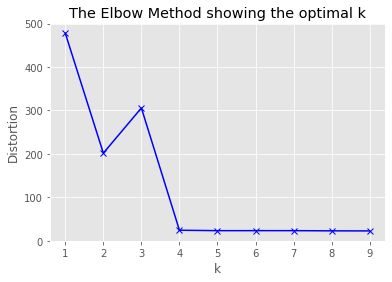

In [756]:
from scipy.spatial.distance import cdist

distortions = []
all_group_cluster = analysis_group.drop('Neighborhood', 1).drop('City_code',1).drop('Borough',1)
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(all_group_cluster)
    #kmeanModel.fit(istanbul_grouped_clustering)
    distortions.append(sum(np.min(cdist(all_group_cluster, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / all_group_cluster.shape[0])

#There are different metric distance function for spatial distance. 
#I choose correlation instaed of euclidean because the canberra function gives me more clear view of elbow break point.

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [757]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(all_group_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

array([2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2],
      dtype=int32)

In [679]:
# Form the final dataset which include each neighborhood's name, city_code, assigned_cluster_index, borough and top 10 venues.

fr=[analysis_group[['Neighborhood','City_code','Borough']],neighborhoods_venues_sorted.iloc[:,1:]]

final_cluster_list=pd.concat(fr,axis=1,sort=False)

final_cluster_list.insert(2,'Assigned_cluster_index',kmeans.labels_)

In [680]:
# Cluster distribution
final_cluster_list['Assigned_cluster_index'].value_counts()

2    242
0    168
1     20
3      2
Name: Assigned_cluster_index, dtype: int64

In [681]:
final_cluster_list.head()

,Neighborhood,City_code,Assigned_cluster_index,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,1,2,Scarborough,Breakfast Spot,Clothing Store,Lounge,Skating Rink,Latin American Restaurant,Empanada Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service
1,"Alderwood, Long Branch",1,0,Etobicoke,Pizza Place,Sandwich Place,Pub,Skating Rink,Gym,Coffee Shop,Yoga Studio,Event Service,Eye Doctor,Exhibit
2,Allerton,0,0,Bronx,Pizza Place,Chinese Restaurant,Supermarket,Deli / Bodega,Discount Store,Electronics Store,Spa,Gas Station,Donut Shop,Bike Trail
3,Annadale,0,0,Staten Island,Pizza Place,Train Station,Diner,Liquor Store,Pharmacy,Restaurant,Event Service,Factory,Eye Doctor,Exhibit
4,Arden Heights,0,0,Staten Island,Pharmacy,Coffee Shop,Bus Stop,Pizza Place,Yoga Studio,Farm,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant


In [682]:
cluster0=final_cluster_list[final_cluster_list['Assigned_cluster_index']==0]['City_code'].value_counts()
cluster0

0    155
1     13
Name: City_code, dtype: int64

In [683]:
cluster1=final_cluster_list[final_cluster_list['Assigned_cluster_index']==1]['City_code'].value_counts()
cluster1

1    15
0     4
2     1
Name: City_code, dtype: int64

In [684]:
cluster2=final_cluster_list[final_cluster_list['Assigned_cluster_index']==2]['City_code'].value_counts()
cluster2

0    143
1     71
2     28
Name: City_code, dtype: int64

In [685]:
cluster3=final_cluster_list[final_cluster_list['Assigned_cluster_index']==3]['City_code'].value_counts()
cluster3

1    2
Name: City_code, dtype: int64

In [686]:
count=final_cluster_list['Assigned_cluster_index'].value_counts()
count

2    242
0    168
1     20
3      2
Name: Assigned_cluster_index, dtype: int64

In [688]:
# define the dataframe columns
column_names1 = ['City_code','City', 'Cluster 0', 'Cluster 1','Cluster 2','Cluster 3'] 

# instantiate the dataframe
output_analysis = pd.DataFrame(columns=column_names1)

output_analysis['City_code']=np.arange(3)
output_analysis['City']=list(['New_york','Toronto','Paris'])
output_analysis['Cluster 0']=[155/302,13/101,0/29]
output_analysis['Cluster 1']=[4/302,15/101,1/29]
output_analysis['Cluster 2']=[143/302,71/101,28/29]
output_analysis['Cluster 3']=[0/302,2/101,0/29]


output_analysis

,City_code,City,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,0,New_york,0.513245,0.013245,0.473510,0.000000
1,1,Toronto,0.128713,0.148515,0.702970,0.019802
2,2,Paris,0.000000,0.034483,0.965517,0.000000


In [689]:
new1=output_analysis.T.iloc[2:,]
new1

,0,1,2
Cluster 0,0.513245,0.128713,0
Cluster 1,0.013245,0.148515,0.0344828
Cluster 2,0.47351,0.70297,0.965517
Cluster 3,0,0.019802,0


In [690]:
new_cluster_df =new1.rename(columns={0: "New_york", 1: "Toronto", 2: "Paris"})
new_cluster_df 

,New_york,Toronto,Paris
Cluster 0,0.513245,0.128713,0
Cluster 1,0.013245,0.148515,0.0344828
Cluster 2,0.47351,0.70297,0.965517
Cluster 3,0,0.019802,0


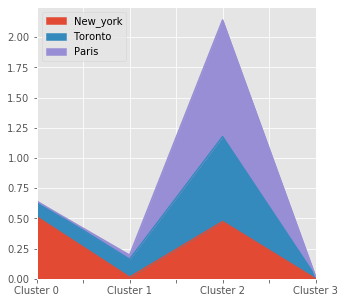

In [691]:
new_cluster_df.plot(kind='area',figsize=(5,5))

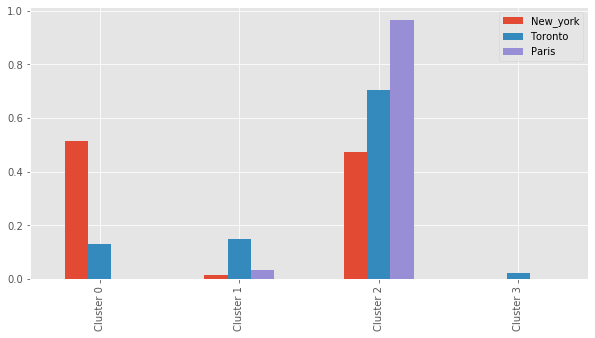

In [692]:
new_cluster_df.plot(kind='bar',figsize=(10,5))

In [693]:
cluster0_df =final_cluster_list[final_cluster_list['Assigned_cluster_index']==0]
cluster0_df.head(10) #Urban Pioneer (Up-and-Coming) Area


,Neighborhood,City_code,Assigned_cluster_index,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Alderwood, Long Branch",1,0,Etobicoke,Pizza Place,Sandwich Place,Pub,Skating Rink,Gym,Coffee Shop,Yoga Studio,Event Service,Eye Doctor,Exhibit
2,Allerton,0,0,Bronx,Pizza Place,Chinese Restaurant,Supermarket,Deli / Bodega,Discount Store,Electronics Store,Spa,Gas Station,Donut Shop,Bike Trail
3,Annadale,0,0,Staten Island,Pizza Place,Train Station,Diner,Liquor Store,Pharmacy,Restaurant,Event Service,Factory,Eye Doctor,Exhibit
4,Arden Heights,0,0,Staten Island,Pharmacy,Coffee Shop,Bus Stop,Pizza Place,Yoga Studio,Farm,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant
5,Arlington,0,0,Staten Island,Deli / Bodega,Intersection,Bus Stop,Grocery Store,Boat or Ferry,American Restaurant,Factory,Farmers Market,Farm,Falafel Restaurant
6,Arrochar,0,0,Staten Island,Bus Stop,Italian Restaurant,Pizza Place,Deli / Bodega,Nail Salon,Athletics & Sports,Sandwich Place,Middle Eastern Restaurant,Outdoors & Recreation,Bagel Shop
9,Astoria Heights,0,0,Queens,Shopping Mall,Bus Station,Hostel,Italian Restaurant,Burger Joint,Playground,Museum,Bakery,Pizza Place,Supermarket
11,Bath Beach,0,0,Brooklyn,Chinese Restaurant,Pizza Place,Bubble Tea Shop,Pharmacy,Gas Station,Sushi Restaurant,Donut Shop,Dessert Shop,Italian Restaurant,Cantonese Restaurant
12,"Bathurst Manor, Wilson Heights, Downsview North",1,0,North York,Bank,Coffee Shop,Sushi Restaurant,Supermarket,Chinese Restaurant,Middle Eastern Restaurant,Sandwich Place,Mobile Phone Shop,Pharmacy,Gas Station
17,Baychester,0,0,Bronx,Donut Shop,Fried Chicken Joint,Discount Store,Sporting Goods Shop,Spanish Restaurant,Supermarket,Boat or Ferry,Fast Food Restaurant,Mexican Restaurant,Men's Store


In [694]:
cluster1_df =final_cluster_list[final_cluster_list['Assigned_cluster_index']==1] #Residential Area
cluster1_df.head(10)

,Neighborhood,City_code,Assigned_cluster_index,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
53,Caledonia-Fairbanks,1,1,York,Park,Women's Store,Pool,Yoga Studio,Farmers Market,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service
74,Clason Point,0,1,Bronx,Park,Scenic Lookout,Convenience Store,Playground,Bus Stop,Pool,Boat or Ferry,South American Restaurant,Grocery Store,Event Service
101,Downsview East,1,1,North York,Airport,Park,Yoga Studio,Fast Food Restaurant,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service,Event Space
103,Downsview West,1,1,North York,Bank,Shopping Mall,Park,Yoga Studio,Empanada Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service,Event Space
152,Glencairn,1,1,North York,Italian Restaurant,Japanese Restaurant,Park,Bakery,Fast Food Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service,Event Space
189,Humewood-Cedarvale,1,1,York,Trail,Park,Hockey Arena,Field,Yoga Studio,Falafel Restaurant,Empanada Restaurant,English Restaurant,Entertainment Service,Escape Room
207,"Kingsview Village, St. Phillips, Martin Grove ...",1,1,Etobicoke,Mobile Phone Shop,Park,Bus Line,Sandwich Place,Yoga Studio,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service,Event Space
210,Lawrence Park,1,1,Central Toronto,Lake,Park,Dim Sum Restaurant,Bus Line,Swim School,Event Service,Ethiopian Restaurant,Event Space,Fast Food Restaurant,Exhibit
246,"Milliken, Agincourt North, Steeles East, L'Amo...",1,1,Scarborough,Intersection,Park,Playground,Yoga Studio,Farmers Market,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service
249,"Moore Park, Summerhill East",1,1,Central Toronto,Park,Lawyer,Tennis Court,Yoga Studio,Farmers Market,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service,Event Space


In [695]:
cluster2_df =final_cluster_list[final_cluster_list['Assigned_cluster_index']==2] # Urban Core Downtown Area
cluster2_df.head(10)

,Neighborhood,City_code,Assigned_cluster_index,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,1,2,Scarborough,Breakfast Spot,Clothing Store,Lounge,Skating Rink,Latin American Restaurant,Empanada Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service
7,Arverne,0,2,Queens,Surf Spot,Metro Station,Sandwich Place,Café,Donut Shop,Coffee Shop,Board Shop,BBQ Joint,Pizza Place,Bus Stop
8,Astoria,0,2,Queens,Greek Restaurant,Bar,Middle Eastern Restaurant,Café,Bakery,Hookah Bar,Seafood Restaurant,Pizza Place,Indian Restaurant,Pub
10,Auburndale,0,2,Queens,Italian Restaurant,Fast Food Restaurant,Toy / Game Store,Train,Athletics & Sports,Pet Store,Sushi Restaurant,Miscellaneous Shop,Discount Store,Mobile Phone Shop
13,Batignolles-Monceau,2,2,Batignolles-Monceau,French Restaurant,Hotel,Italian Restaurant,Bakery,Sandwich Place,Park,Pizza Place,Sushi Restaurant,Mediterranean Restaurant,Moroccan Restaurant
14,Battery Park City,0,2,Manhattan,Park,Coffee Shop,Clothing Store,Hotel,Playground,Memorial Site,Boat or Ferry,Gym,Pizza Place,BBQ Joint
15,Bay Ridge,0,2,Brooklyn,Spa,Italian Restaurant,Pizza Place,Bagel Shop,Bar,Grocery Store,American Restaurant,Greek Restaurant,Café,Hookah Bar
16,Bay Terrace,0,2,Staten Island,Clothing Store,American Restaurant,Donut Shop,Supermarket,Women's Store,Men's Store,Kids Store,Cosmetics Shop,Shoe Store,Mobile Phone Shop
18,Bayside,0,2,Queens,Bar,Pizza Place,Indian Restaurant,Sushi Restaurant,Pub,Chinese Restaurant,Mexican Restaurant,Steakhouse,Italian Restaurant,Greek Restaurant
19,Bayswater,0,2,Queens,Construction & Landscaping,Playground,Yoga Studio,Fast Food Restaurant,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service,Event Space


In [696]:
cluster3_df =final_cluster_list[final_cluster_list['Assigned_cluster_index']==3] #Suburbs Area
cluster3_df.head()

,Neighborhood,City_code,Assigned_cluster_index,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
188,"Humberlea, Emery",1,3,North York,Baseball Field,Yoga Studio,Empanada Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor
279,"Old Mill South, King's Mill Park, Sunnylea, Hu...",1,3,Etobicoke,Baseball Field,Business Service,Yoga Studio,Fast Food Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit


In [697]:
a=final_cluster_list[final_cluster_list['Assigned_cluster_index']==0]

#select all datasets in New_york
b=a[a['City_code']==0]

b.groupby('Borough').count()

#Cluster 0 New York => Bronx, Brooklyn, Queens, Staten Island


,Neighborhood,City_code,Assigned_cluster_index,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Borough,,,,,,,,,,,,,
Bronx,45,45,45,45,45,45,45,45,45,45,45,45,45
Brooklyn,30,30,30,30,30,30,30,30,30,30,30,30,30
Manhattan,2,2,2,2,2,2,2,2,2,2,2,2,2
Queens,45,45,45,45,45,45,45,45,45,45,45,45,45
Staten Island,33,33,33,33,33,33,33,33,33,33,33,33,33


In [698]:
#select all datasets in cluster 0
NY_cluster0_df=b.loc[b['Borough'].isin(['Brooklyn','Bronx','Queens','Staten Island'])]
NY_cluster0_df.head(10)

,Neighborhood,City_code,Assigned_cluster_index,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Allerton,0,0,Bronx,Pizza Place,Chinese Restaurant,Supermarket,Deli / Bodega,Discount Store,Electronics Store,Spa,Gas Station,Donut Shop,Bike Trail
3,Annadale,0,0,Staten Island,Pizza Place,Train Station,Diner,Liquor Store,Pharmacy,Restaurant,Event Service,Factory,Eye Doctor,Exhibit
4,Arden Heights,0,0,Staten Island,Pharmacy,Coffee Shop,Bus Stop,Pizza Place,Yoga Studio,Farm,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant
5,Arlington,0,0,Staten Island,Deli / Bodega,Intersection,Bus Stop,Grocery Store,Boat or Ferry,American Restaurant,Factory,Farmers Market,Farm,Falafel Restaurant
6,Arrochar,0,0,Staten Island,Bus Stop,Italian Restaurant,Pizza Place,Deli / Bodega,Nail Salon,Athletics & Sports,Sandwich Place,Middle Eastern Restaurant,Outdoors & Recreation,Bagel Shop
9,Astoria Heights,0,0,Queens,Shopping Mall,Bus Station,Hostel,Italian Restaurant,Burger Joint,Playground,Museum,Bakery,Pizza Place,Supermarket
11,Bath Beach,0,0,Brooklyn,Chinese Restaurant,Pizza Place,Bubble Tea Shop,Pharmacy,Gas Station,Sushi Restaurant,Donut Shop,Dessert Shop,Italian Restaurant,Cantonese Restaurant
17,Baychester,0,0,Bronx,Donut Shop,Fried Chicken Joint,Discount Store,Sporting Goods Shop,Spanish Restaurant,Supermarket,Boat or Ferry,Fast Food Restaurant,Mexican Restaurant,Men's Store
21,Bedford Park,0,0,Bronx,Chinese Restaurant,Pizza Place,Diner,Mexican Restaurant,Deli / Bodega,Food Truck,Spanish Restaurant,Sandwich Place,Donut Shop,Pharmacy
24,Beechhurst,0,0,Queens,Chinese Restaurant,Yoga Studio,Restaurant,Gym / Fitness Center,Park,Donut Shop,Pet Store,Salad Place,Pizza Place,Optical Shop


In [699]:
a=final_cluster_list[final_cluster_list['Assigned_cluster_index']==1]

#select all datasets in New_york
b=a[a['City_code']==0]

b.groupby('Borough').count()

#Cluster 1 New York => Bronx, Queends, Staten Island

,Neighborhood,City_code,Assigned_cluster_index,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Borough,,,,,,,,,,,,,
Bronx,1,1,1,1,1,1,1,1,1,1,1,1,1
Queens,2,2,2,2,2,2,2,2,2,2,2,2,2
Staten Island,1,1,1,1,1,1,1,1,1,1,1,1,1


In [700]:
#select all datasets in cluster1
NY_cluster1_df=b.loc[b['Borough'].isin(['Bronx','Queens','Staten Island'])]
NY_cluster1_df.head(10)

,Neighborhood,City_code,Assigned_cluster_index,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
74,Clason Point,0,1,Bronx,Park,Scenic Lookout,Convenience Store,Playground,Bus Stop,Pool,Boat or Ferry,South American Restaurant,Grocery Store,Event Service
352,Somerville,0,1,Queens,Surf Spot,Park,Yoga Studio,Farmers Market,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service,Event Space
356,South Ozone Park,0,1,Queens,Park,Deli / Bodega,Food Truck,Sandwich Place,Bar,Fast Food Restaurant,Hotel,Donut Shop,Home Service,Exhibit
384,Todt Hill,0,1,Staten Island,Park,Yoga Studio,Fried Chicken Joint,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit


In [701]:
a=final_cluster_list[final_cluster_list['Assigned_cluster_index']==2]

#select all datasets in New_york
b=a[a['City_code']==0]

b.groupby('Borough').count()

#Cluster 0 New York => Brookln, Manhanttan

,Neighborhood,City_code,Assigned_cluster_index,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Borough,,,,,,,,,,,,,
Bronx,6,6,6,6,6,6,6,6,6,6,6,6,6
Brooklyn,40,40,40,40,40,40,40,40,40,40,40,40,40
Manhattan,37,37,37,37,37,37,37,37,37,37,37,37,37
Queens,31,31,31,31,31,31,31,31,31,31,31,31,31
Staten Island,29,29,29,29,29,29,29,29,29,29,29,29,29


In [702]:
#select all datasets in Manhattan
NY_cluster2_df=b.loc[b['Borough'].isin(['Brooklyn','Manhattan'])]
NY_cluster2_df.head(10)

,Neighborhood,City_code,Assigned_cluster_index,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Battery Park City,0,2,Manhattan,Park,Coffee Shop,Clothing Store,Hotel,Playground,Memorial Site,Boat or Ferry,Gym,Pizza Place,BBQ Joint
15,Bay Ridge,0,2,Brooklyn,Spa,Italian Restaurant,Pizza Place,Bagel Shop,Bar,Grocery Store,American Restaurant,Greek Restaurant,Café,Hookah Bar
23,Bedford Stuyvesant,0,2,Brooklyn,Coffee Shop,Bar,Pizza Place,Café,Thrift / Vintage Store,Park,Tiki Bar,Bagel Shop,Cocktail Bar,Gourmet Shop
29,Bensonhurst,0,2,Brooklyn,Italian Restaurant,Chinese Restaurant,Donut Shop,Ice Cream Shop,Sushi Restaurant,Grocery Store,Pet Store,Bagel Shop,Bakery,Liquor Store
31,Bergen Beach,0,2,Brooklyn,Harbor / Marina,Playground,Baseball Field,Park,Athletics & Sports,Empanada Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service
35,Boerum Hill,0,2,Brooklyn,Coffee Shop,Bar,Dance Studio,Furniture / Home Store,Arts & Crafts Store,Sandwich Place,French Restaurant,Cosmetics Shop,Cocktail Bar,Spa
40,Brighton Beach,0,2,Brooklyn,Russian Restaurant,Pharmacy,Beach,Gourmet Shop,Restaurant,Eastern European Restaurant,Bank,Mobile Phone Shop,Sushi Restaurant,Donut Shop
42,Broadway Junction,0,2,Brooklyn,Donut Shop,Gas Station,Fried Chicken Joint,Ice Cream Shop,Sandwich Place,Caribbean Restaurant,Lounge,Diner,Hotel,Coffee Shop
45,Brooklyn Heights,0,2,Brooklyn,Yoga Studio,Deli / Bodega,Coffee Shop,Gym / Fitness Center,Pizza Place,Plaza,Cosmetics Shop,Park,Italian Restaurant,Grocery Store
49,Bushwick,0,2,Brooklyn,Bar,Mexican Restaurant,Coffee Shop,Deli / Bodega,Thrift / Vintage Store,Discount Store,Bakery,Pizza Place,Vegetarian / Vegan Restaurant,Caribbean Restaurant


In [703]:
a=final_cluster_list[final_cluster_list['Assigned_cluster_index']==0]

#select all datasets in Toronto
Toronto=a[a['City_code']==1]

Toronto.groupby('Borough').count() #Etobicoke, North York, Scarborough

,Neighborhood,City_code,Assigned_cluster_index,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Borough,,,,,,,,,,,,,
Central Toronto,1,1,1,1,1,1,1,1,1,1,1,1,1
East York,1,1,1,1,1,1,1,1,1,1,1,1,1
Etobicoke,4,4,4,4,4,4,4,4,4,4,4,4,4
North York,3,3,3,3,3,3,3,3,3,3,3,3,3
Scarborough,3,3,3,3,3,3,3,3,3,3,3,3,3
York,1,1,1,1,1,1,1,1,1,1,1,1,1


In [704]:
a=final_cluster_list[final_cluster_list['Assigned_cluster_index']==1]

#select all datasets in Toronto
Toronto=a[a['City_code']==1]

Toronto.groupby('Borough').count() #North York, York

,Neighborhood,City_code,Assigned_cluster_index,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Borough,,,,,,,,,,,,,
Central Toronto,2,2,2,2,2,2,2,2,2,2,2,2,2
East York,1,1,1,1,1,1,1,1,1,1,1,1,1
Etobicoke,1,1,1,1,1,1,1,1,1,1,1,1,1
North York,7,7,7,7,7,7,7,7,7,7,7,7,7
Scarborough,1,1,1,1,1,1,1,1,1,1,1,1,1
York,3,3,3,3,3,3,3,3,3,3,3,3,3


In [705]:
a=final_cluster_list[final_cluster_list['Assigned_cluster_index']==2]

#select all datasets in Toronto
Toronto=a[a['City_code']==1]

Toronto.groupby('Borough').count() # Downtown Toronto, Norht York, East Toronto, Scarborough, West Tornoto, Central Toronto

,Neighborhood,City_code,Assigned_cluster_index,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Borough,,,,,,,,,,,,,
Central Toronto,6,6,6,6,6,6,6,6,6,6,6,6,6
Downtown Toronto,18,18,18,18,18,18,18,18,18,18,18,18,18
East Toronto,5,5,5,5,5,5,5,5,5,5,5,5,5
East York,3,3,3,3,3,3,3,3,3,3,3,3,3
Etobicoke,6,6,6,6,6,6,6,6,6,6,6,6,6
North York,13,13,13,13,13,13,13,13,13,13,13,13,13
Scarborough,13,13,13,13,13,13,13,13,13,13,13,13,13
West Toronto,6,6,6,6,6,6,6,6,6,6,6,6,6
York,1,1,1,1,1,1,1,1,1,1,1,1,1


In [708]:
a=final_cluster_list[final_cluster_list['Assigned_cluster_index']==3]

#select all datasets in Toronto
Toronto=a[a['City_code']==1]

Toronto.groupby('Borough').count() #Etobicoke, Norht York

,Neighborhood,City_code,Assigned_cluster_index,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Borough,,,,,,,,,,,,,
Etobicoke,1,1,1,1,1,1,1,1,1,1,1,1,1
North York,1,1,1,1,1,1,1,1,1,1,1,1,1


In [709]:
#select all datasets in cluster 2
a=final_cluster_list[final_cluster_list['Assigned_cluster_index']==2]

#select all datasets containing Toronto name
downtown_Tornoto_df=a.loc[a['Borough'].isin(['Downtown Toronto','East Toronto','West Toronto','Central Toronto'])]

#select all datasets in Downtown Toronto
#downtown_Tornoto_df=d.loc[d['Borough']=='Downtown Toronto']
downtown_Tornoto_df.head(10)

,Neighborhood,City_code,Assigned_cluster_index,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Berczy Park,1,2,Downtown Toronto,Bakery,Coffee Shop,Farmers Market,Restaurant,Beer Bar,Pharmacy,Seafood Restaurant,Cheese Shop,Cocktail Bar,Breakfast Spot
43,"Brockton, Parkdale Village, Exhibition Place",1,2,West Toronto,Café,Breakfast Spot,Coffee Shop,Bar,Restaurant,Stadium,Burrito Place,Furniture / Home Store,Grocery Store,Gym
52,"CN Tower, King and Spadina, Railway Lands, Har...",1,2,Downtown Toronto,Airport Lounge,Airport Service,Coffee Shop,Sculpture Garden,Boat or Ferry,Rental Car Location,Airport Terminal,Harbor / Marina,Airport Gate,Airport
61,Central Bay Street,1,2,Downtown Toronto,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Japanese Restaurant,Bubble Tea Shop,Burger Joint,Salad Place,Department Store,Poke Place
66,Christie,1,2,Downtown Toronto,Grocery Store,Café,Park,Restaurant,Baby Store,Coffee Shop,Candy Store,Italian Restaurant,Nightclub,Flower Shop
67,Church and Wellesley,1,2,Downtown Toronto,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Gay Bar,Yoga Studio,Pub,Hotel,Bubble Tea Shop,Fast Food Restaurant
82,"Commerce Court, Victoria Hotel",1,2,Downtown Toronto,Coffee Shop,Restaurant,Café,Hotel,Gym,Japanese Restaurant,Deli / Bodega,Bakery,American Restaurant,Seafood Restaurant
92,Davisville North,1,2,Central Toronto,Breakfast Spot,Gym,Sandwich Place,Hotel,Department Store,Park,Playground,Food & Drink Shop,Gym / Fitness Center,Ethiopian Restaurant
105,"Dufferin, Dovercourt Village",1,2,West Toronto,Pharmacy,Bakery,Brewery,Music Venue,Supermarket,Bus Stop,Café,Middle Eastern Restaurant,Grocery Store,Gym / Fitness Center
124,Enclave of M4L,1,2,East Toronto,Yoga Studio,Restaurant,Gym / Fitness Center,Skate Park,Auto Workshop,Light Rail Station,Smoke Shop,Farmers Market,Pizza Place,Garden Center


In [710]:
a=final_cluster_list[final_cluster_list['Assigned_cluster_index']==1]

#select all datasets in Paris
Paris=a[a['City_code']==2]

Paris.groupby('Borough').count() # Restidential Area

,Neighborhood,City_code,Assigned_cluster_index,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Borough,,,,,,,,,,,,,
Observatoire,1,1,1,1,1,1,1,1,1,1,1,1,1


In [711]:
a=final_cluster_list[final_cluster_list['Assigned_cluster_index']==2]

#select all datasets in Paris
Paris=a[a['City_code']==2]

Paris.groupby('Borough').count() #Downtown Area Butte-Montmartre, Elysee, Vaugiard

,Neighborhood,City_code,Assigned_cluster_index,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Borough,,,,,,,,,,,,,
Batignolles-Monceau,1,1,1,1,1,1,1,1,1,1,1,1,1
Bourse,1,1,1,1,1,1,1,1,1,1,1,1,1
Butte-Montmartre,4,4,4,4,4,4,4,4,4,4,4,4,4
Buttes-Chaumont,1,1,1,1,1,1,1,1,1,1,1,1,1
Elysee,4,4,4,4,4,4,4,4,4,4,4,4,4
Entrepot,1,1,1,1,1,1,1,1,1,1,1,1,1
Gobelins,1,1,1,1,1,1,1,1,1,1,1,1,1
Hotel-de-Ville,1,1,1,1,1,1,1,1,1,1,1,1,1
Louvre,1,1,1,1,1,1,1,1,1,1,1,1,1


In [712]:
# select all datasets in cluster 2, in Paris boroughs of 'Butte-Montmartre','Elysee' and 'Vaugirard' as an example, the major theme is "French restaurant & hotel"
#select all datasets in cluster 2
a=final_cluster_list[final_cluster_list['Assigned_cluster_index']==2]

#select all datasets containing Paris name
g=a[a['City_code']==2]

#select all datasets in three boroughs where data density is high
downtown_Paris_df=g.loc[g['Borough'].isin(['Butte-Montmartre','Elysee','Vaugirard'])]
downtown_Paris_df

,Neighborhood,City_code,Assigned_cluster_index,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
156,Goutte d'Or,2,2,Butte-Montmartre,Supermarket,Bakery,Bistro,Chinese Restaurant,Theater,Café,Bar,French Restaurant,Convenience Store,Beer Bar
167,Grenelle,2,2,Vaugirard,French Restaurant,Hotel,Japanese Restaurant,Bakery,Bistro,Cheese Shop,Gym / Fitness Center,Coffee Shop,Creperie,Indian Restaurant
199,Javel,2,2,Vaugirard,French Restaurant,Hotel,Café,Pizza Place,Japanese Restaurant,Supermarket,Restaurant,Bike Rental / Bike Share,Bakery,Lebanese Restaurant
248,Montmartre,2,2,Butte-Montmartre,French Restaurant,Italian Restaurant,Plaza,Bar,Bistro,Café,Park,Garden,Bakery,Art Museum
258,Necker,2,2,Vaugirard,French Restaurant,Hotel,Café,Grocery Store,Dessert Shop,Korean Restaurant,Pizza Place,Bakery,Bookstore,Bistro
298,Pigalle,2,2,Butte-Montmartre,French Restaurant,Hotel,Italian Restaurant,Bar,Bakery,Japanese Restaurant,Bistro,Music Venue,Candy Store,Chinese Restaurant
309,Quartier de La Chapelle,2,2,Butte-Montmartre,Chinese Restaurant,Asian Restaurant,Soccer Field,Supermarket,Vietnamese Restaurant,Thai Restaurant,Bakery,Mexican Restaurant,Farmers Market,Fast Food Restaurant
310,Quartier de l'Europe,2,2,Elysee,Hotel,French Restaurant,Café,Bistro,Italian Restaurant,Salad Place,Pizza Place,Bar,Cosmetics Shop,Pub
311,Quartier de la Madeleine,2,2,Elysee,French Restaurant,Hotel,Boutique,Women's Store,Gourmet Shop,Garden,Dessert Shop,Clothing Store,Hotel Bar,Asian Restaurant
312,Quartier des Champs-Elysees,2,2,Elysee,French Restaurant,Boutique,Italian Restaurant,Hotel,Clothing Store,Steakhouse,Women's Store,Bistro,Art Gallery,Plaza


In [713]:
NewYork_Cluster_Group=final_cluster_list[final_cluster_list['City_code']==0]
NewYork_Cluster_Group.groupby('Assigned_cluster_index').count()

,Neighborhood,City_code,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Assigned_cluster_index,,,,,,,,,,,,,
0,155,155,155,155,155,155,155,155,155,155,155,155,155
1,4,4,4,4,4,4,4,4,4,4,4,4,4
2,143,143,143,143,143,143,143,143,143,143,143,143,143


In [714]:
Toronto_Cluster_Group=final_cluster_list[final_cluster_list['City_code']==1]
Toronto_Cluster_Group.groupby('Assigned_cluster_index').count()

,Neighborhood,City_code,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Assigned_cluster_index,,,,,,,,,,,,,
0,13,13,13,13,13,13,13,13,13,13,13,13,13
1,15,15,15,15,15,15,15,15,15,15,15,15,15
2,71,71,71,71,71,71,71,71,71,71,71,71,71
3,2,2,2,2,2,2,2,2,2,2,2,2,2


In [715]:
Paris_Cluster_Group=final_cluster_list[final_cluster_list['City_code']==2]
Paris_Cluster_Group.groupby('Assigned_cluster_index').count()

,Neighborhood,City_code,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Assigned_cluster_index,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,28,28,28,28,28,28,28,28,28,28,28,28,28


In [717]:
# To open up business in areas where many venues are densely located
business_newyork=final_cluster_list[final_cluster_list['City_code']==0]
business_newyork.groupby('Borough').count()

,Neighborhood,City_code,Assigned_cluster_index,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Borough,,,,,,,,,,,,,
Bronx,52,52,52,52,52,52,52,52,52,52,52,52,52
Brooklyn,70,70,70,70,70,70,70,70,70,70,70,70,70
Manhattan,39,39,39,39,39,39,39,39,39,39,39,39,39
Queens,78,78,78,78,78,78,78,78,78,78,78,78,78
Staten Island,63,63,63,63,63,63,63,63,63,63,63,63,63


In [718]:
# To open up business in areas where many venues are densely located
business_toronto=final_cluster_list[final_cluster_list['City_code']==1]
business_toronto.groupby('Borough').count()

,Neighborhood,City_code,Assigned_cluster_index,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Borough,,,,,,,,,,,,,
Central Toronto,9,9,9,9,9,9,9,9,9,9,9,9,9
Downtown Toronto,18,18,18,18,18,18,18,18,18,18,18,18,18
East Toronto,5,5,5,5,5,5,5,5,5,5,5,5,5
East York,5,5,5,5,5,5,5,5,5,5,5,5,5
Etobicoke,12,12,12,12,12,12,12,12,12,12,12,12,12
North York,24,24,24,24,24,24,24,24,24,24,24,24,24
Scarborough,17,17,17,17,17,17,17,17,17,17,17,17,17
West Toronto,6,6,6,6,6,6,6,6,6,6,6,6,6
York,5,5,5,5,5,5,5,5,5,5,5,5,5


In [719]:
# To open up business in areas where many venues are densely located
business_toronto=final_cluster_list[final_cluster_list['City_code']==2]
business_toronto.groupby('Borough').count()

,Neighborhood,City_code,Assigned_cluster_index,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Borough,,,,,,,,,,,,,
Batignolles-Monceau,1,1,1,1,1,1,1,1,1,1,1,1,1
Bourse,1,1,1,1,1,1,1,1,1,1,1,1,1
Butte-Montmartre,4,4,4,4,4,4,4,4,4,4,4,4,4
Buttes-Chaumont,1,1,1,1,1,1,1,1,1,1,1,1,1
Elysee,4,4,4,4,4,4,4,4,4,4,4,4,4
Entrepot,1,1,1,1,1,1,1,1,1,1,1,1,1
Gobelins,1,1,1,1,1,1,1,1,1,1,1,1,1
Hotel-de-Ville,1,1,1,1,1,1,1,1,1,1,1,1,1
Louvre,1,1,1,1,1,1,1,1,1,1,1,1,1


In [720]:
NY_cluster2_df.groupby('Borough').count()

,Neighborhood,City_code,Assigned_cluster_index,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Borough,,,,,,,,,,,,,
Brooklyn,40,40,40,40,40,40,40,40,40,40,40,40,40
Manhattan,37,37,37,37,37,37,37,37,37,37,37,37,37


In [721]:
downtown_Tornoto_df.groupby('Borough').count()

,Neighborhood,City_code,Assigned_cluster_index,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Borough,,,,,,,,,,,,,
Central Toronto,6,6,6,6,6,6,6,6,6,6,6,6,6
Downtown Toronto,18,18,18,18,18,18,18,18,18,18,18,18,18
East Toronto,5,5,5,5,5,5,5,5,5,5,5,5,5
West Toronto,6,6,6,6,6,6,6,6,6,6,6,6,6


In [722]:
downtown_Paris_df.groupby('Borough').count()

,Neighborhood,City_code,Assigned_cluster_index,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Borough,,,,,,,,,,,,,
Butte-Montmartre,4,4,4,4,4,4,4,4,4,4,4,4,4
Elysee,4,4,4,4,4,4,4,4,4,4,4,4,4
Vaugirard,4,4,4,4,4,4,4,4,4,4,4,4,4


### Top 3 venues in City of New York, Toronto and Paris

In [742]:
cluster0_first = cluster0_df[['Neighborhood','1st Most Common Venue']].groupby('1st Most Common Venue').count().sort_values(by='Neighborhood', ascending=False).reset_index()
cluster0_first.rename(columns={'1st Most Common Venue':'Venue'}, inplace=True)
cluster0_first.head()

,Venue,Neighborhood
0,Pizza Place,38
1,Deli / Bodega,22
2,Chinese Restaurant,12
3,Bank,10
4,Pharmacy,8


In [741]:
cluster1_first = cluster1_df[['Neighborhood','1st Most Common Venue']].groupby('1st Most Common Venue').count().sort_values(by='Neighborhood', ascending=False).reset_index()
cluster1_first.rename(columns={'1st Most Common Venue':'Venue'}, inplace=True)
cluster1_first.head()

,Venue,Neighborhood
0,Park,7
1,Convenience Store,2
2,Airport,1
3,Bakery,1
4,Bank,1


In [739]:
cluster2_first = cluster2_df[['Neighborhood','1st Most Common Venue']].groupby('1st Most Common Venue').count().sort_values(by='Neighborhood', ascending=False).reset_index()
cluster2_first.rename(columns={'1st Most Common Venue':'Venue'}, inplace=True)
cluster2_first.head()

,Venue,Neighborhood
0,Coffee Shop,34
1,French Restaurant,21
2,Italian Restaurant,20
3,Bar,13
4,Café,10


In [740]:
cluster3_first = cluster3_df[['Neighborhood','1st Most Common Venue']].groupby('1st Most Common Venue').count().sort_values(by='Neighborhood', ascending=False).reset_index()
cluster3_first.rename(columns={'1st Most Common Venue':'Venue'}, inplace=True)
cluster3_first.head()

,Venue,Neighborhood
0,Baseball Field,2


In [748]:
clusters_top3 = pd.concat([cluster0_first, cluster1_first, cluster2_first,cluster3_first])
clusters_top3 = cluster_0_top3.groupby(by='Venue').sum().sort_values(by='Neighborhood', ascending=False)
top15_venues = clusters_top3.head(15)
top15_venues

,Neighborhood
Venue,
Pizza Place,41
Coffee Shop,36
Italian Restaurant,24
Deli / Bodega,22
French Restaurant,21
Chinese Restaurant,17
Bank,16
Bar,15
Park,11


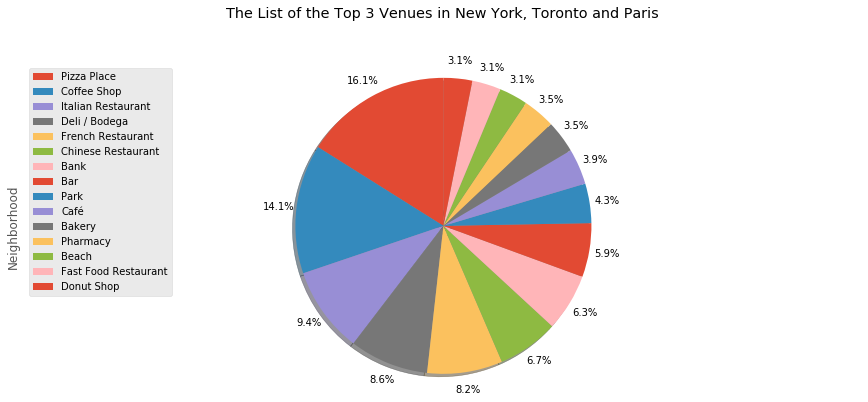

In [751]:
# colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
# ratio for each venue with which to offset each wedge.
explode_list = [0.1, 0.1, 0.1, 0.1, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

top15_venues['Neighborhood'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
#                             colors=colors_list,  # add custom colors
                      # explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('The List of the Top 3 Venues in New York, Toronto and Paris', y=1.12, loc='center') 

plt.axis('equal') 

# add legend
plt.legend(labels=cluster_0_top3.index, loc='upper left') 

plt.show()

### Map Cluster 

In [723]:
cluster_list = final_cluster_list[['City_code','Neighborhood','Assigned_cluster_index']]
cluster_list.shape

(432, 3)

In [724]:
dataset_list = all_datasets[['Neighborhood','Latitude','Longitude']]
dataset_list.shape

(14544, 3)

In [725]:
#cluster_merged = cluster_list.join(dataset_list, how="inner")
cluster_merged = cluster_list.join(dataset_list.set_index('Neighborhood'), on='Neighborhood',how="inner")
cluster_merged.shape
cluster_merged = cluster_merged.dropna()
#cluster_merged[cluster_merged['Assigned_cluster_index']==1].unique
# sorting by first name
cluster_merged.sort_values("Neighborhood", inplace = True)

#cluster_merged.groupby('City_code').count()
# dropping ALL duplicate values
cluster_merged.drop_duplicates(subset ="Neighborhood",keep = 'last', inplace = True)
cluster_merged.groupby('City_code').count()

,Neighborhood,Assigned_cluster_index,Latitude,Longitude
City_code,,,,
0,302,302,302,302
1,101,101,101,101
2,29,29,29,29


In [726]:
cluster_merged.groupby('Assigned_cluster_index').count()

,City_code,Neighborhood,Latitude,Longitude
Assigned_cluster_index,,,,
0,168,168,168,168
1,20,20,20,20
2,242,242,242,242
3,2,2,2,2


In [727]:
cluster_newyork=cluster_merged[cluster_merged['City_code']==0]
cluster_toronto=cluster_merged[cluster_merged['City_code']==1]
cluster_paris=cluster_merged[cluster_merged['City_code']==2]
cluster_newyork.head()

,City_code,Neighborhood,Assigned_cluster_index,Latitude,Longitude
2,0,Allerton,0,40.865788,-73.859319
3,0,Annadale,0,40.538114,-74.178549
4,0,Arden Heights,0,40.549286,-74.185887
5,0,Arlington,0,40.635325,-74.165104
6,0,Arrochar,0,40.596313,-74.067124


In [670]:
address = 'New York'

geolocator = Nominatim(user_agent="newyork_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 40.7127281, -74.0060152.


In [671]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
kclusters = 4
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster_newyork['Latitude'], cluster_newyork['Longitude'], cluster_newyork['Neighborhood'], cluster_newyork['Assigned_cluster_index']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [672]:
address = 'Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [673]:
# create map of Toronto Cluster

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
kclusters = 4
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster_toronto['Latitude'], cluster_toronto['Longitude'], cluster_toronto['Neighborhood'], cluster_toronto['Assigned_cluster_index']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [674]:
address = 'Paris'

geolocator = Nominatim(user_agent="paris_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 48.8566969, 2.3514616.


In [675]:
# create map of Toronto Cluster

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
kclusters = 4
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster_paris['Latitude'], cluster_paris['Longitude'], cluster_paris['Neighborhood'], cluster_paris['Assigned_cluster_index']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Results and Discussion: <a id='section5'></a>
<b> I. Analysis of differneces between New York, Toronto and Paris </b> <br/>

According to the analysis, New York with cities of Toronto and Paris generally, in terms of city diversity, New York is more alike with Toronto;

We analyze the four clusters 

Based on the data analysis, we determined these following busiest area in terms of food venues in neighborhoods connected to the downtown area of Toronto, New York City and Paris, where are suitable to open a restaurant and this place is the recommended one. <br>
(1)	specific ares of New York (Brooklyn, Manhattan) <br>
(2)	Toronto ('Downtown Toronto','East Toronto','West Toronto','Central Toronto') and <br>
(3)	Paris ('Butte-Montmartre','Elysee','Vaugirard')<br>

Only from this evaluation it is assumed that these zones are appreciated regions for food locations. Although these are appropriate place, it may be a suitable choice for some food venues. 

Based on the analysis, we found that Pizza shop, Coffee Shop, Italian restaurant, Deli/Bodega and French restaurant are most popular places in New York, Paris and Toronto respectively.

I used K-means clustering analysis method to classify the area/venue to know the nature of the neighborhoods. According to the clustering analysis, we got four clusters and identify the area names based on the venues data. 

(1)	<b> Cluster 1 </b> => <b> Urban Pioneer (up-and-coming) Area</b> where is near downtown area and inner-ring suburbs. <br/>
(2)	<b> Cluster 2</b> => <b> Residential Area </b> where large single family homes are situated and this is active neighborhood.<br/>
(3)	<b> Cluster 3 </b> => <b> Urban Core Downtown Area </b> where is downtown area which is the heart of the major metros. This area is close to nightlife and has the city attraction. There is little to no public parking, typically has higher rates of crimes and transients. <br/>
(4)	<b> Cluster 4 </b> => <b> Suburbs Area </b> where is far from the downtown area of the city and it has space and privacy. <br/>

<b> II.	Data analysis result of New York City:</b>

Based on the analysis, we defined the following boroughs in the respective clusters / defined areas. According to the analysis, New York is defined in the three clusters.

1)	<b> Cluster 1</b> : We can define the some areas of Bronx, the Brooklyn, Queens, Staten Island are in the clusters 1 and these areas are urban pioneer area so that the entrepreneurs may open their restaurants in this area. <br/>
2)	<b>Cluster 2</b> : We can define the some areas of Bronx, Queens, Staten Island are in the clusters 2 and these areas are residential area so that the convenience store and food truck is more suitable to open there.<br/>
3)	 <b> Cluster 3</b> : We can define the some areas of Brooklyn and Manhattan are in the clusters 3 and these areas are heart of city downtown core area so that the entrepreneurs should open their restaurants in this area to make profit. We recommend this area is the best suitable and profitable place to start up the business. However, we must consider the other factors such as rent, competitors, etc.<br/>
4)	<b> Cluster 4</b> : There is no neighborhoods in this cluster area.<br/>

<b> III.	Data analysis result of  Toronto:</b> 

Based on the analysis, we defined the following boroughs in the respective clusters / defined areas. According to the analysis, Toronto is defined in the four clusters.

1)	<b>Cluster 1</b> : We can define the some areas of Etobicoke, North York, Scarborough are in the clusters 1 and these areas are urban pioneer area.<br/>
2)	<b>Cluster 2</b> : We can define the some areas of North York and York are in the clusters 2 and these areas are residential area so that the gocery store and food truck is more suitable to open there.<br/>
3)	<b>Cluster 3</b> : We can define the some areas of Downtown Toronto, North York, East Toronto, Scarborough, West Toronto, Central Toronto are in the clusters 3 and these areas are core area so that the entrepreneurs should open their restaurants in this area to make profit. This is the recommended place for an entrepreneurs and business owners.<br/>
4)	<b>Cluster 4</b> : We can define the some areas of Etobicoke and North York are in the clusters 4 and these areas are suburb area so that we cannot make much profit to start the business there.<br/>

<b> IV.	Data analysis result of  Paris :</b> 

Based on the analysis, we defined the following boroughs in the respective clusters / defined areas. According to the analysis, Paris is defined in the two clusters.

1)	<b> Cluster 1</b> : There is no neighborhoods in this cluster area.<br/>
2)	<b> Cluster 2</b> : We can define the Obervatoire is in the clusters 2 and these areas are residential area so that the convenience store and food truck is more proper to open there.<br/>
3)	<b>Cluster 3</b> : We can define the areas of Butte-Montmartre, Elysee, Vaugiard are in the clusters 3 and these areas are city downtown core area where is the recommended place which is the best appropriate and commercial place to start up the business. <br/>
4)	<b>Cluster 4</b> : There is no neighborhoods in this cluster area.

### Conclustions: <a id='section6'></a>

<b> V. Conclusion </b>

The goal of this report was to help investors trying to find venues to open a restaurant or start up a business in the city of New York, Toronto and Paris. There are many causes that affect the situation of a food venue. In this analysis, studies were prepared considering only the location of the competition factor. 

First of all, all places in the food grouping were gathered on the basis of Neighborhood using the Foursquare api. As a outcome of the study made subsequently, the density of foodstuff locations in the city was discovered. Thus, the competition aspect at the all-purpose level was observed. Afterward, going a little more detailed, the occurrence of food venues in the neighborhoods was discovered as a result of analysis. Thus, investors will be able to easily choose an opening outlet by taking this information into concern during the place choice phase.

Conclusively, it should be noticed that the investors should pay attention to all aspects when selecting the place for the food venue. We must understand these factors as follows: human resources, rental fees, demography, labor costs and minimum wage, health regulations and zoning, security / crime rates , proximity to suppliers, competition, discernibility, future growth and rules & regulations,. When the stakeholders study all these features, they will be able to decide the greatest location for their business or restaurants. 
